# Steps

In [3]:
# Define the problem
    # Binary classification

# Data Access
    # (.info(), describe(), .shape, .head(), .tail(), isnull(), .value_counts())
# Exploratory Data Analysis (EDA)
    # univariate analysis, bivariate analysis, (.distplot(), .countplot(), .boxplot(), .scatterplot(), .pairplot()), 
    # distribution (.histplot())
    # corellation (.heatmap())

# Data Preprocessing
    # from sklearn.model_selection import train_test_split
    # from sklearn.preprocessing import StandardScaler
    # data types, data mixture, shape, outliers, missing values, noisy data, skewness and kurtosis
# Model Building
    # from sklearn.linear_model import LogisticRegression, SGDClassifier
    # from sklearn.svm import LinearSVC
    # from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
    # from sklearn.naive_bayes import GaussianNB
    
# Model Validation
    # from sklearn.pipeline import Pipeline
    # from sklearn.model_selection import KFold, cross_val_score
    # from sklearn.model_selection import StratifiedKFold, KFold
    # from sklearn.model_selection import GridSearchCV
# Model Execution
    # Confusion Matrix: A breakdown of predictions into a table showing correct predictions (the diagonal) and the types of incorrect predictions made (what classes incorrect predictions were assigned).
    # Precision: A measure of a classifiers exactness.
    # Recall: A measure of a classifiers completeness
    # F1 Score (or F-score): A weighted average of precision and recall.
# Deployment

# Data Access

In [25]:
import numpy as np
import pandas as pd

In [5]:
def data_load() -> list:
    """ """
    
    train_data = pd.read_csv("project_data/train_data.csv", header=None)
    test_data = pd.read_csv("project_data/test_data.csv", header=None)
    train_labels = pd.read_csv("project_data/train_labels.csv", header=None)
    
    return [train_data, test_data, train_labels]

In [6]:
train_data, test_data, train_labels = data_load()

In [7]:
data = [train_data, test_data, train_labels]
names = ["train_data", "test_data", "train_labels"]

# EDA

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
def data_info(data: list, names: list) -> None: 
    """ """
    
    for d, n in zip(data, names):
        print(f"""
####################################
\ninfo for {n}\n
####################################
        """)
        d.info()

In [9]:
data_info(data, names) # problem: multidimensional dataset, solution: dimensional reduction (Correlation Heatmap, Univariate Selection/ PCA - Principal Component Analysis/ RFE - Recursive Feature Elimination)


####################################

info for train_data

####################################
        
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750 entries, 0 to 3749
Columns: 10000 entries, 0 to 9999
dtypes: float64(10000)
memory usage: 286.1 MB

####################################

info for test_data

####################################
        
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Columns: 10000 entries, 0 to 9999
dtypes: float64(10000)
memory usage: 95.4 MB

####################################

info for train_labels

####################################
        
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750 entries, 0 to 3749
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       3750 non-null   int64
dtypes: int64(1)
memory usage: 29.4 KB


In [10]:
def data_describe(data:list, names:list) -> None:
    """ """
    
    for d, n in zip(data, names):
        print(f"""
####################################
\ndescribe for {n}\n
####################################
        """)
        print(d.describe())

In [11]:
data_describe(data, names) # problem: (binary) classsification, solution: relevant ml models (SGDClassifier, LogisticRegression, LinearSVC)


####################################

describe for train_data

####################################
        
              0            1              2              3             4     \
count  3750.000000  3750.000000    3750.000000    3750.000000   3750.000000   
mean     30.644135     9.080955     169.679419     811.083532   -186.008805   
std     286.172414   213.166659   43665.003613   57123.457110  21942.466227   
min    -989.450000  -859.922000 -163336.428000 -243844.632000 -77566.109000   
25%    -163.781750  -135.343500  -29284.119500  -38028.429000 -14426.799500   
50%      35.478500     2.680500    1181.698500     980.588000   -154.835000   
75%     215.780500   156.095750   29630.914500   40561.960250  14515.833000   
max    1224.394000   722.868000  177744.241000  215372.854000  86287.955000   

              5            6            7            8            9     ...  \
count  3750.000000  3750.000000  3750.000000  3750.000000  3750.000000  ...   
mean     25.717789  

In [12]:
def data_isnull(data:list, name:list) -> None:
    """ """
    
    for d, n in zip(data, names):
        print(f"""
#############################################################
\ndescending percentage of null values in columns of {n}\n
#############################################################
        """)
        print(round(d.isnull().sum().sort_values(ascending=False)/len(d)*100,2))

In [13]:
data_isnull(data, names) # no null values


#############################################################

descending percentage of null values in columns of train_data

#############################################################
        
0       0.0
6670    0.0
6663    0.0
6664    0.0
6665    0.0
       ... 
3333    0.0
3334    0.0
3335    0.0
3336    0.0
9999    0.0
Length: 10000, dtype: float64

#############################################################

descending percentage of null values in columns of test_data

#############################################################
        
0       0.0
6670    0.0
6663    0.0
6664    0.0
6665    0.0
       ... 
3333    0.0
3334    0.0
3335    0.0
3336    0.0
9999    0.0
Length: 10000, dtype: float64

#############################################################

descending percentage of null values in columns of train_labels

#############################################################
        
0    0.0
dtype: float64


In [14]:
label_data = [train_labels]
label_names = ["train_labels"]

In [15]:
def data_count(label_data:list, label_names:list) -> None:
    """ """
    
    for d, n in zip(label_data, label_names):
        print(f"""
#############################################################
\nvalues counts of {n}\n
#############################################################
        """)
        print(d.value_counts())

In [16]:
data_count(label_data, label_names) # problem: unbalanced dataset, solution: Random Oversampling/SMOTE



#############################################################

values counts of train_labels

#############################################################
        
 1    3375
-1     375
dtype: int64


In [18]:
sliced_train_data = train_data.iloc[:,0:10000:500]

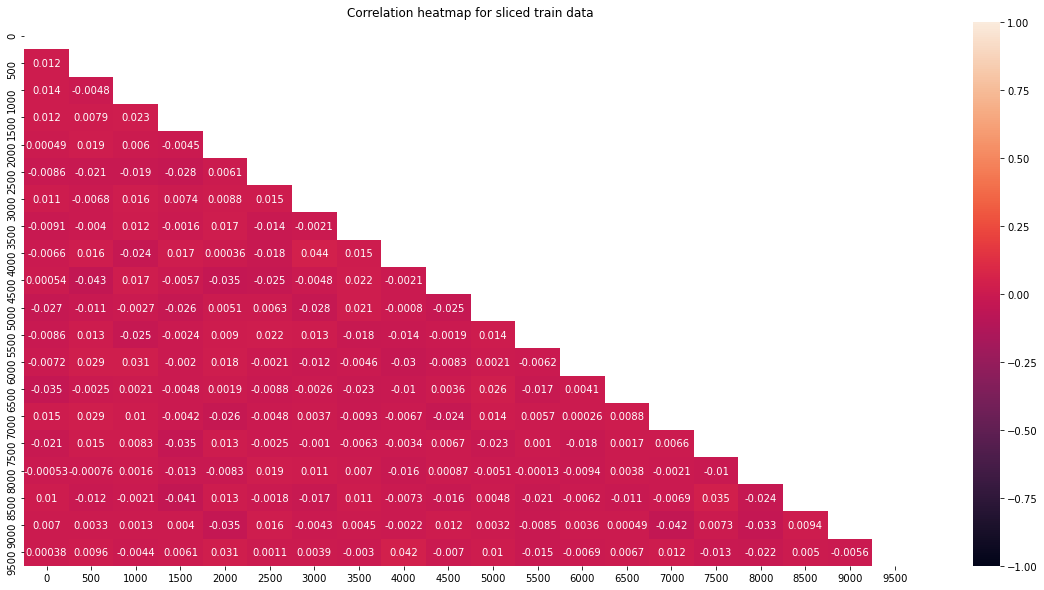

In [26]:
# checking corellation heatmap
plt.figure(figsize=(20, 10))
# Masking the upper triangle part of the matrix
heat_mask = np.triu(np.ones_like(sliced_train_data.corr(), dtype=bool))
# Plotting heatmap
sns.heatmap(sliced_train_data.corr(), mask=heat_mask, vmin=-1, vmax=1, annot=True)
plt.title("Correlation heatmap for sliced train data");

In [27]:
# checking duplicates
train_data.duplicated().sum()

0